In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

df = pd.read_csv("cybersecurity_training/cybersecurity_training.csv" , sep = '|') 
df1 = pd.read_csv("cybersecurity_test/cybersecurity_test.csv" , sep = '|') 


#df.isnull().values.any() checking for null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   alert_ids                 39427 non-null  object 
 1   client_code               39427 non-null  object 
 2   notified                  39427 non-null  int64  
 3   categoryname              39427 non-null  object 
 4   ip                        39427 non-null  object 
 5   ipcategory_name           39427 non-null  object 
 6   ipcategory_scope          39427 non-null  object 
 7   parent_category           39427 non-null  int64  
 8   grandparent_category      39427 non-null  object 
 9   overallseverity           39427 non-null  int64  
 10  timestamp_dist            39427 non-null  int64  
 11  start_hour                39427 non-null  int64  
 12  start_minute              39427 non-null  int64  
 13  start_second              39427 non-null  int64  
 14  weekda

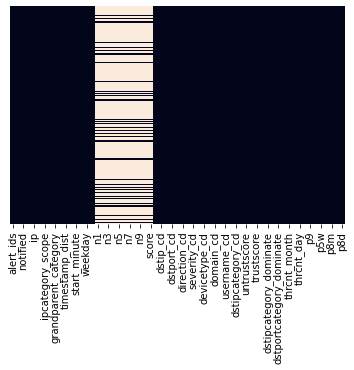

In [2]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
df.info()
df1.info()

In [3]:
print(df.shape)

print(df1.shape)

(39427, 63)
(20000, 62)


In [4]:

X_train = df.drop(['notified'] , axis =1)
X_train = X_train.drop(['client_code' ,'alert_ids'] , axis = 1)
print(X_train)


X_test = df1
X_test = X_test.drop(['client_code' ,'alert_ids'] , axis = 1)


y_train = df['notified']
print(y_train)



               categoryname             ip ipcategory_name ipcategory_scope  \
0                    Attack    YT.LB.32.21        INTERNET         Internet   
1                   Exploit   192.SL.UK.94        PRIV-192  Private network   
2                    Attack    YT.LB.38.21        INTERNET         Internet   
3                    Attack    JX.NY.13.20        INTERNET         Internet   
4                    Attack    YT.LB.32.21        INTERNET         Internet   
...                     ...            ...             ...              ...   
39422                Attack   MC.ER.197.27        INTERNET         Internet   
39423  Control and Maintain   10.XU.AD.142         PRIV-10  Private network   
39424                Attack    YT.LB.38.21        INTERNET         Internet   
39425               Exploit  NZ.XH.108.109        INTERNET         Internet   
39426                Attack     FX.NB.56.3        INTERNET         Internet   

       parent_category grandparent_category  overal

In [5]:
X_train['n1']=df['n1'].fillna(df['n1'].mode()[0])
X_train['n2']=df['n2'].fillna(df['n2'].mode()[0])
X_train['n3']=df['n3'].fillna(df['n3'].mode()[0])
X_train['n4']=df['n4'].fillna(df['n4'].mode()[0])
X_train['n5']=df['n5'].fillna(df['n5'].mode()[0])
X_train['n6']=df['n6'].fillna(df['n6'].mode()[0])
X_train['n7']=df['n7'].fillna(df['n7'].mode()[0])
X_train['n8']=df['n8'].fillna(df['n8'].mode()[0])
X_train['n9']=df['n9'].fillna(df['n9'].mode()[0])
X_train = X_train.drop(['n10'] , axis = 1) #only contains 0 or null


X_test['n1']=df1['n1'].fillna(df1['n1'].mode()[0])
X_test['n2']=df1['n2'].fillna(df1['n2'].mode()[0])
X_test['n3']=df1['n3'].fillna(df1['n3'].mode()[0])
X_test['n4']=df1['n4'].fillna(df1['n4'].mode()[0])
X_test['n5']=df1['n5'].fillna(df1['n5'].mode()[0])
X_test['n6']=df1['n6'].fillna(df1['n6'].mode()[0])
X_test['n7']=df1['n7'].fillna(df1['n7'].mode()[0])
X_test['n8']=df1['n8'].fillna(df1['n8'].mode()[0])
X_test['n9']=df1['n9'].fillna(df1['n9'].mode()[0])
X_test = X_test.drop(['n10'] , axis = 1) #only contains 0 or null

print(X_test)

      categoryname             ip ipcategory_name ipcategory_scope  \
0          Exploit    MW.YB.50.64        INTERNET         Internet   
1          Exploit    IJ.NW.77.74        INTERNET         Internet   
2           Attack    YT.LB.36.21        INTERNET         Internet   
3           Attack  172.BW.LB.105        PRIV-172  Private network   
4          Exploit   YT.LB.32.110        INTERNET         Internet   
...            ...            ...             ...              ...   
19995      Exploit   YT.LB.133.99        INTERNET         Internet   
19996      Exploit  MA.LA.169.242        INTERNET         Internet   
19997      Exploit   10.NF.RC.138         PRIV-10  Private network   
19998       Attack     KN.IR.6.26        INTERNET         Internet   
19999      Exploit  JM.KV.177.114        INTERNET         Internet   

       parent_category grandparent_category  overallseverity  timestamp_dist  \
0                    7                    A                3               0   

In [6]:
list(X_train.columns.values)

['categoryname',
 'ip',
 'ipcategory_name',
 'ipcategory_scope',
 'parent_category',
 'grandparent_category',
 'overallseverity',
 'timestamp_dist',
 'start_hour',
 'start_minute',
 'start_second',
 'weekday',
 'correlatedcount',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'score',
 'srcip_cd',
 'dstip_cd',
 'srcport_cd',
 'dstport_cd',
 'alerttype_cd',
 'direction_cd',
 'eventname_cd',
 'severity_cd',
 'reportingdevice_cd',
 'devicetype_cd',
 'devicevendor_cd',
 'domain_cd',
 'protocol_cd',
 'username_cd',
 'srcipcategory_cd',
 'dstipcategory_cd',
 'isiptrusted',
 'untrustscore',
 'flowscore',
 'trustscore',
 'enforcementscore',
 'dstipcategory_dominate',
 'srcipcategory_dominate',
 'dstportcategory_dominate',
 'srcportcategory_dominate',
 'thrcnt_month',
 'thrcnt_week',
 'thrcnt_day',
 'p6',
 'p9',
 'p5m',
 'p5w',
 'p5d',
 'p8m',
 'p8w',
 'p8d']

In [7]:
#alert_ids - different for each row
#client_code - 276/ 39427
#notified - 2
#categoryname - 11 
#ip - 12945 / 39427
#ipcategory_name - 9
#ipcategory_scope - 4
#parent_category - 5

for i in list(X_train.columns.values):
    print ( i + "   " + str(len(X_train[i].unique())))
    if(len(X_train[i].unique()) < 100):
        print(X_train[i].unique())



categoryname   11
['Attack' 'Exploit' 'Suspicious Reputation' 'Control and Maintain'
 'Reconnaissance' 'Malicious Activity' 'Suspicious Network Activity'
 'Attack Preparation' 'Compromise' 'Suspicious Account Activity'
 'To Be Determined']
ip   12945
ipcategory_name   9
['INTERNET' 'PRIV-192' 'PRIV-10' 'PRIV-172' 'PRIV-CGN' 'LOOPBACK'
 'LINK-LOCAL' 'BROADCAST' 'MULTICAST']
ipcategory_scope   4
['Internet' 'Private network' 'Host' 'Subnet']
parent_category   5
[7 1 3 4 5]
grandparent_category   2
['A' 'B']
overallseverity   5
[3 5 4 2 1]
timestamp_dist   16215
start_hour   24
[ 8  1 14 20 16 11  0 19  6 21 22 10 15  2 18  5 13  3 12  9 17  4 23  7]
start_minute   60
[14  0 44 33 36 56 31 22 32 51  1  5 28 57  7 47 23 21 24 34  6 30 53 15
 10 52 29 39  4 17 18 42 59 25  3 16 46  8 40 49 45 26 43 20 13 50 11 37
  2 48 38 19 58 12 55  9 27 54 41 35]
start_second   60
[34  2  5 40 11 13 41 43  9 36 20 39 26  1 27 14 54 51 56 16 17 18  0 59
 47 24 30 32 44 50  7 58 33 49 22  6  8 19 57 15 38

In [8]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   categoryname              20000 non-null  object 
 1   ip                        20000 non-null  object 
 2   ipcategory_name           20000 non-null  object 
 3   ipcategory_scope          20000 non-null  object 
 4   parent_category           20000 non-null  int64  
 5   grandparent_category      20000 non-null  object 
 6   overallseverity           20000 non-null  int64  
 7   timestamp_dist            20000 non-null  int64  
 8   start_hour                20000 non-null  int64  
 9   start_minute              20000 non-null  int64  
 10  start_second              20000 non-null  int64  
 11  weekday                   20000 non-null  object 
 12  correlatedcount           20000 non-null  int64  
 13  n1                        20000 non-null  float64
 14  n2    

In [9]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   categoryname              39427 non-null  object 
 1   ip                        39427 non-null  object 
 2   ipcategory_name           39427 non-null  object 
 3   ipcategory_scope          39427 non-null  object 
 4   parent_category           39427 non-null  int64  
 5   grandparent_category      39427 non-null  object 
 6   overallseverity           39427 non-null  int64  
 7   timestamp_dist            39427 non-null  int64  
 8   start_hour                39427 non-null  int64  
 9   start_minute              39427 non-null  int64  
 10  start_second              39427 non-null  int64  
 11  weekday                   39427 non-null  object 
 12  correlatedcount           39427 non-null  int64  
 13  n1                        39427 non-null  float64
 14  n2    

In [10]:
#handeling categorical features



X_train = X_train.append(X_test)

# split IPs to prefix
X_train['ip_prefix'] = X_train['ip'].apply(lambda x: ".".join(x.split('.')[:1]))
vc = X_train['ip_prefix'].value_counts()
X_train['ip_prefix_aggreg'] = X_train['ip_prefix'].apply(lambda x: x if vc[x]>100 else "other")
X_train['ip_prefix_aggreg'].value_counts().size

categorical_string_columns = ['categoryname', 'ipcategory_name', 'ipcategory_scope', 'grandparent_category', 'weekday', 'ip_prefix_aggreg']
categorical_numeric_columns = ['parent_category','overallseverity', 'start_hour', 'start_minute', 'start_second', 'score', 'alerttype_cd', 'direction_cd', 'eventname_cd', 'isiptrusted', 'dstipcategory_dominate', 'srcipcategory_dominate', 'dstportcategory_dominate', 'srcportcategory_dominate', 'p6', 'p5m', 'p5w', 'p5d', 'p8m', 'p8w', 'p8d']
binary_columns = [ 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']



string_columns =  [ 'categoryname', 'ip', 'ipcategory_name', 'ipcategory_scope','parent_category','grandparent_category', 'weekday', 'dstipcategory_dominate', 'srcipcategory_dominate', 'ip_prefix', 'ip_prefix_aggreg']
no_strings_X_train = X_train.drop(string_columns, axis=1)


def encode(original, concate, list_of_columns):
    for column in list_of_columns:
        dummies = pd.get_dummies(columns=[column], data=original[column], prefix=column)
        concate = pd.concat([concate, dummies], axis=1)
    return concate

columns_to_encode = ['categoryname', 'weekday','ipcategory_name', 'ipcategory_scope','grandparent_category', 'dstipcategory_dominate', 'srcipcategory_dominate', 'ip_prefix_aggreg']
encoded_category = encode(X_train, no_strings_X_train, columns_to_encode)
for column in columns_to_encode:
    if column in encoded_category.columns:
        encoded = encoded.drop(column, axis=1)
print("After categorical encoding: ", len(encoded_category.columns))

# numerical columns
columns_to_encode = categorical_numeric_columns
encoded = encode(X_train, encoded_category, columns_to_encode)
for column in columns_to_encode:
    if column in encoded.columns:
        encoded = encoded.drop(column, axis=1)
print("After numerical encoding: " ,len(encoded.columns))



print(encoded)
print(encoded_category.info())

print(X_train.shape)






After categorical encoding:  157
After numerical encoding:  396
       timestamp_dist  correlatedcount   n1   n2   n3   n4   n5   n6   n7  \
0               65684               69  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1             1188030             5302  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2               43716              346  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                   0                1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                2401                1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...               ...              ...  ...  ...  ...  ...  ...  ...  ...   
19995           43201                3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19996               0                1  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
19997               1                2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19998             748                1  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
19999           13111               20  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

        n8 

In [11]:
X_train = X_train.drop(['grandparent_category','categoryname' , 'ip' , 'ipcategory_name' , 'ipcategory_scope' , 'weekday' ,'dstipcategory_dominate' , 'srcipcategory_dominate' , 'ip_prefix' , 'ip_prefix_aggreg'] , axis =1)
print(X_train)

       parent_category  overallseverity  timestamp_dist  start_hour  \
0                    7                3           65684           8   
1                    1                5         1188030           1   
2                    7                4           43716          14   
3                    7                4               0          20   
4                    7                4            2401          14   
...                ...              ...             ...         ...   
19995                7                2           43201          19   
19996                7                3               0          13   
19997                1                5               1          18   
19998                7                3             748           8   
19999                7                5           13111          13   

       start_minute  start_second  correlatedcount   n1   n2   n3  ...  \
0                14            34               69  0.0  0.0  0.0  ...   

In [12]:
X_train = pd.concat([X_train,encoded ,encoded_category ],axis=1)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59427 entries, 0 to 19999
Columns: 604 entries, parent_category to ip_prefix_aggreg_other
dtypes: float64(29), int64(104), uint8(471)
memory usage: 87.4 MB
None


In [13]:
X_train = X_train.drop(['score'] , axis =1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59427 entries, 0 to 19999
Columns: 602 entries, parent_category to ip_prefix_aggreg_other
dtypes: float64(27), int64(104), uint8(471)
memory usage: 86.5 MB
[]


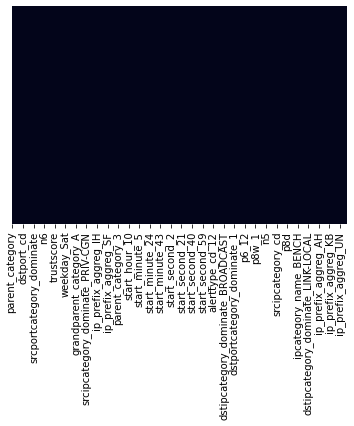

In [14]:
X_train.isnull().values.any()
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False)
X_train.info()



nan_values = X_train.isna()
nan_columns = nan_values.any()

columns_with_nan = X_train.columns[nan_columns].tolist()
print(columns_with_nan)

In [15]:
print(X_train)


       parent_category  overallseverity  timestamp_dist  start_hour  \
0                    7                3           65684           8   
1                    1                5         1188030           1   
2                    7                4           43716          14   
3                    7                4               0          20   
4                    7                4            2401          14   
...                ...              ...             ...         ...   
19995                7                2           43201          19   
19996                7                3               0          13   
19997                1                5               1          18   
19998                7                3             748           8   
19999                7                5           13111          13   

       start_minute  start_second  correlatedcount   n1   n2   n3  ...  \
0                14            34               69  0.0  0.0  0.0  ...   

       0     1             2         3         4         5         6    7    \
39427  1.0  0.50  0.000000e+00  0.478261  0.745763  0.440678  0.000000  0.0   
39428  1.0  1.00  0.000000e+00  0.956522  0.661017  0.508475  0.000000  0.0   
39429  1.0  0.50  0.000000e+00  0.304348  0.966102  0.084746  0.000000  0.0   
39430  0.0  0.50  0.000000e+00  0.000000  0.355932  0.559322  0.000000  0.0   
39431  1.0  0.50  9.061804e-02  0.782609  0.661017  0.491525  0.000014  0.0   
...    ...   ...           ...       ...       ...       ...       ...  ...   
59422  1.0  0.25  1.515756e-02  0.826087  0.203390  0.118644  0.000002  0.0   
59423  1.0  0.50  0.000000e+00  0.565217  0.016949  0.440678  0.000000  0.0   
59424  0.0  1.00  3.508614e-07  0.782609  0.745763  0.135593  0.000001  0.0   
59425  1.0  0.50  2.624444e-04  0.347826  0.796610  0.644068  0.000000  0.0   
59426  1.0  1.00  4.600144e-03  0.565217  0.288136  0.067797  0.000021  0.0   

       8    9    ...  592  593  594  595  596  597 

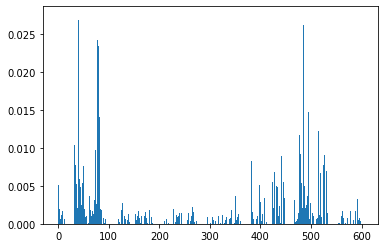

In [16]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

#normalise
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)


X_test = X_train.iloc[39427:,:]
X_train = X_train.iloc[:39427,:]
print(X_test)

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)



list_of_0_score = []

# what are scores for the features
j = 0 
for i in range(len(fs.scores_)):
    #print('Feature %d: %f' % (i, fs.scores_[i]))
    if(fs.scores_[i] < 0.002):
        list_of_0_score.append(i)
        #X_train = X_train.drop(X_train.columns[i], axis=1)
        j = j - 1
    j = j + 1

    
X_train = X_train.drop(list_of_0_score , axis = 1)
X_test = X_test.drop(list_of_0_score , axis = 1)
print(list_of_0_score)
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [17]:
X_test


,0,1,2,6,16,17,18,20,21,22,...,524,525,527,531,540,544,547,592,599,601
39427,1.0,0.50,0.000000e+00,0.000000,0.000092,0.000026,0.000016,0.083333,0.166667,0.071429,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39428,1.0,1.00,0.000000e+00,0.000000,0.000092,0.000026,0.000016,0.083333,0.166667,0.071429,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
39429,1.0,0.50,0.000000e+00,0.000000,0.000092,0.000026,0.000016,0.083333,0.166667,0.071429,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39430,0.0,0.50,0.000000e+00,0.000000,0.000092,0.000026,0.000016,0.083333,0.166667,0.071429,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
39431,1.0,0.50,9.061804e-02,0.000014,0.000092,0.000026,0.000217,0.083333,0.166667,0.142857,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59422,1.0,0.25,1.515756e-02,0.000002,0.000092,0.000026,0.000047,0.083333,0.166667,0.071429,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
59423,1.0,0.50,0.000000e+00,0.000000,0.000092,0.000026,0.000016,0.083333,0.166667,0.071429,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
59424,0.0,1.00,3.508614e-07,0.000001,0.000092,0.000026,0.000016,0.083333,0.166667,0.142857,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
59425,1.0,0.50,2.624444e-04,0.000000,0.000092,0.000026,0.000016,0.083333,0.166667,0.071429,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:

X_Train = X_train
X_Test = X_test
y_Train = y_train

print(X_Train)
print(X_Test)
print(y_Train)

       0     1         2         6         16        17        18        20   \
0      1.0  0.50  0.023046  0.000074  0.003388  0.000026  0.001039  0.083333   
1      0.0  1.00  0.416834  0.005782  0.000092  0.001179  0.073597  0.333333   
2      1.0  0.75  0.015338  0.000376  0.026923  0.000026  0.005334  0.083333   
3      1.0  0.75  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      1.0  0.75  0.000842  0.000000  0.000092  0.000026  0.000016  0.083333   
...    ...   ...       ...       ...       ...       ...       ...       ...   
39422  1.0  1.00  0.001104  0.000004  0.000458  0.000026  0.000078  0.083333   
39423  0.0  0.50  0.024226  0.000001  0.000000  0.000000  0.000000  0.000000   
39424  1.0  0.75  0.011534  0.000001  0.000092  0.000026  0.000031  0.083333   
39425  1.0  0.75  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39426  1.0  0.75  0.000000  0.000000  0.000092  0.000000  0.000000  0.083333   

            21        22   ...  524  52

In [75]:
#neural networks
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 50, 2), random_state=1, activation='logistic', max_iter=10000)
clf.fit(X_Train, y_Train)
predictions_neural = clf.predict_proba(X_Test)
predictions_neural_train = clf.predict_proba(X_Train)


print(metrics.roc_auc_score(y_Test, predictions_neural[:,1]))
print(metrics.roc_auc_score(y_Train, predictions_neural_train[:,1]))

0.74742067409683
0.746819449254711


In [76]:
#KNN
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(X_Train,y_Train)
predictions_KNN = knn.predict_proba(X_Test)
predictions_KNN_train = knn.predict_proba(X_Train)

print(metrics.roc_auc_score(y_Test, predictions_KNN[:,1]))
print(metrics.roc_auc_score(y_Train, predictions_KNN_train[:,1]))

0.8495578169569187
0.8623226593729272


In [19]:
#RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2000, max_depth=30, random_state=0)


rfc = rfc.fit(X_Train,y_Train)

predictions_rfc = rfc.predict_proba(X_Test)
predictions_rfc_train = rfc.predict_proba(X_Train)



print(predictions_rfc)


[[9.99990476e-01 9.52380952e-06]
 [8.79694358e-01 1.20305642e-01]
 [1.00000000e+00 0.00000000e+00]
 ...
 [7.50760320e-01 2.49239680e-01]
 [4.33000000e-01 5.67000000e-01]
 [9.26513725e-01 7.34862745e-02]]


In [26]:
predictions = rfc.predict(X_Test)
print(len(predictions))

df_final = pd.DataFrame(predictions)
df_final.to_csv('Test_prediction.csv', index=False)

20000


In [78]:
'''
#hypertuning RandomForestClassifier
n_estimators = [1000,2000,3000,4000]#list(range(1000,4000,1000))
max_depth = [30,40,50,60]#list(range(30,60,20))

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)

rfc = RandomForestClassifier(random_state=0)
gridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 6, 
                      n_jobs = -1, scoring='roc_auc', refit=True)
bestF = gridF.fit(X_Train,y_Train)
predictions = bestF.predict_proba(X_Test)

print("Best score: ",bestF.best_score_)
print("Best params: ", bestF.best_params_)


output:
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best score:  0.912214266857212
Best params:  {'max_depth': 30, 'n_estimators': 2000}
'''

'\n#hypertuning RandomForestClassifier\nn_estimators = [1000,2000,3000,4000]#list(range(1000,4000,1000))\nmax_depth = [30,40,50,60]#list(range(30,60,20))\n\nhyperF = dict(n_estimators = n_estimators, max_depth = max_depth)\n\nrfc = RandomForestClassifier(random_state=0)\ngridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 6, \n                      n_jobs = -1, scoring=\'roc_auc\', refit=True)\nbestF = gridF.fit(X_Train,y_Train)\npredictions = bestF.predict_proba(X_Test)\n\nprint("Best score: ",bestF.best_score_)\nprint("Best params: ", bestF.best_params_)\n\n\noutput:\nFitting 3 folds for each of 16 candidates, totalling 48 fits\nBest score:  0.912214266857212\nBest params:  {\'max_depth\': 30, \'n_estimators\': 2000}\n'